Importing Nesessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin-1')

In [ ]:
df.head()


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(8760, 17)

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

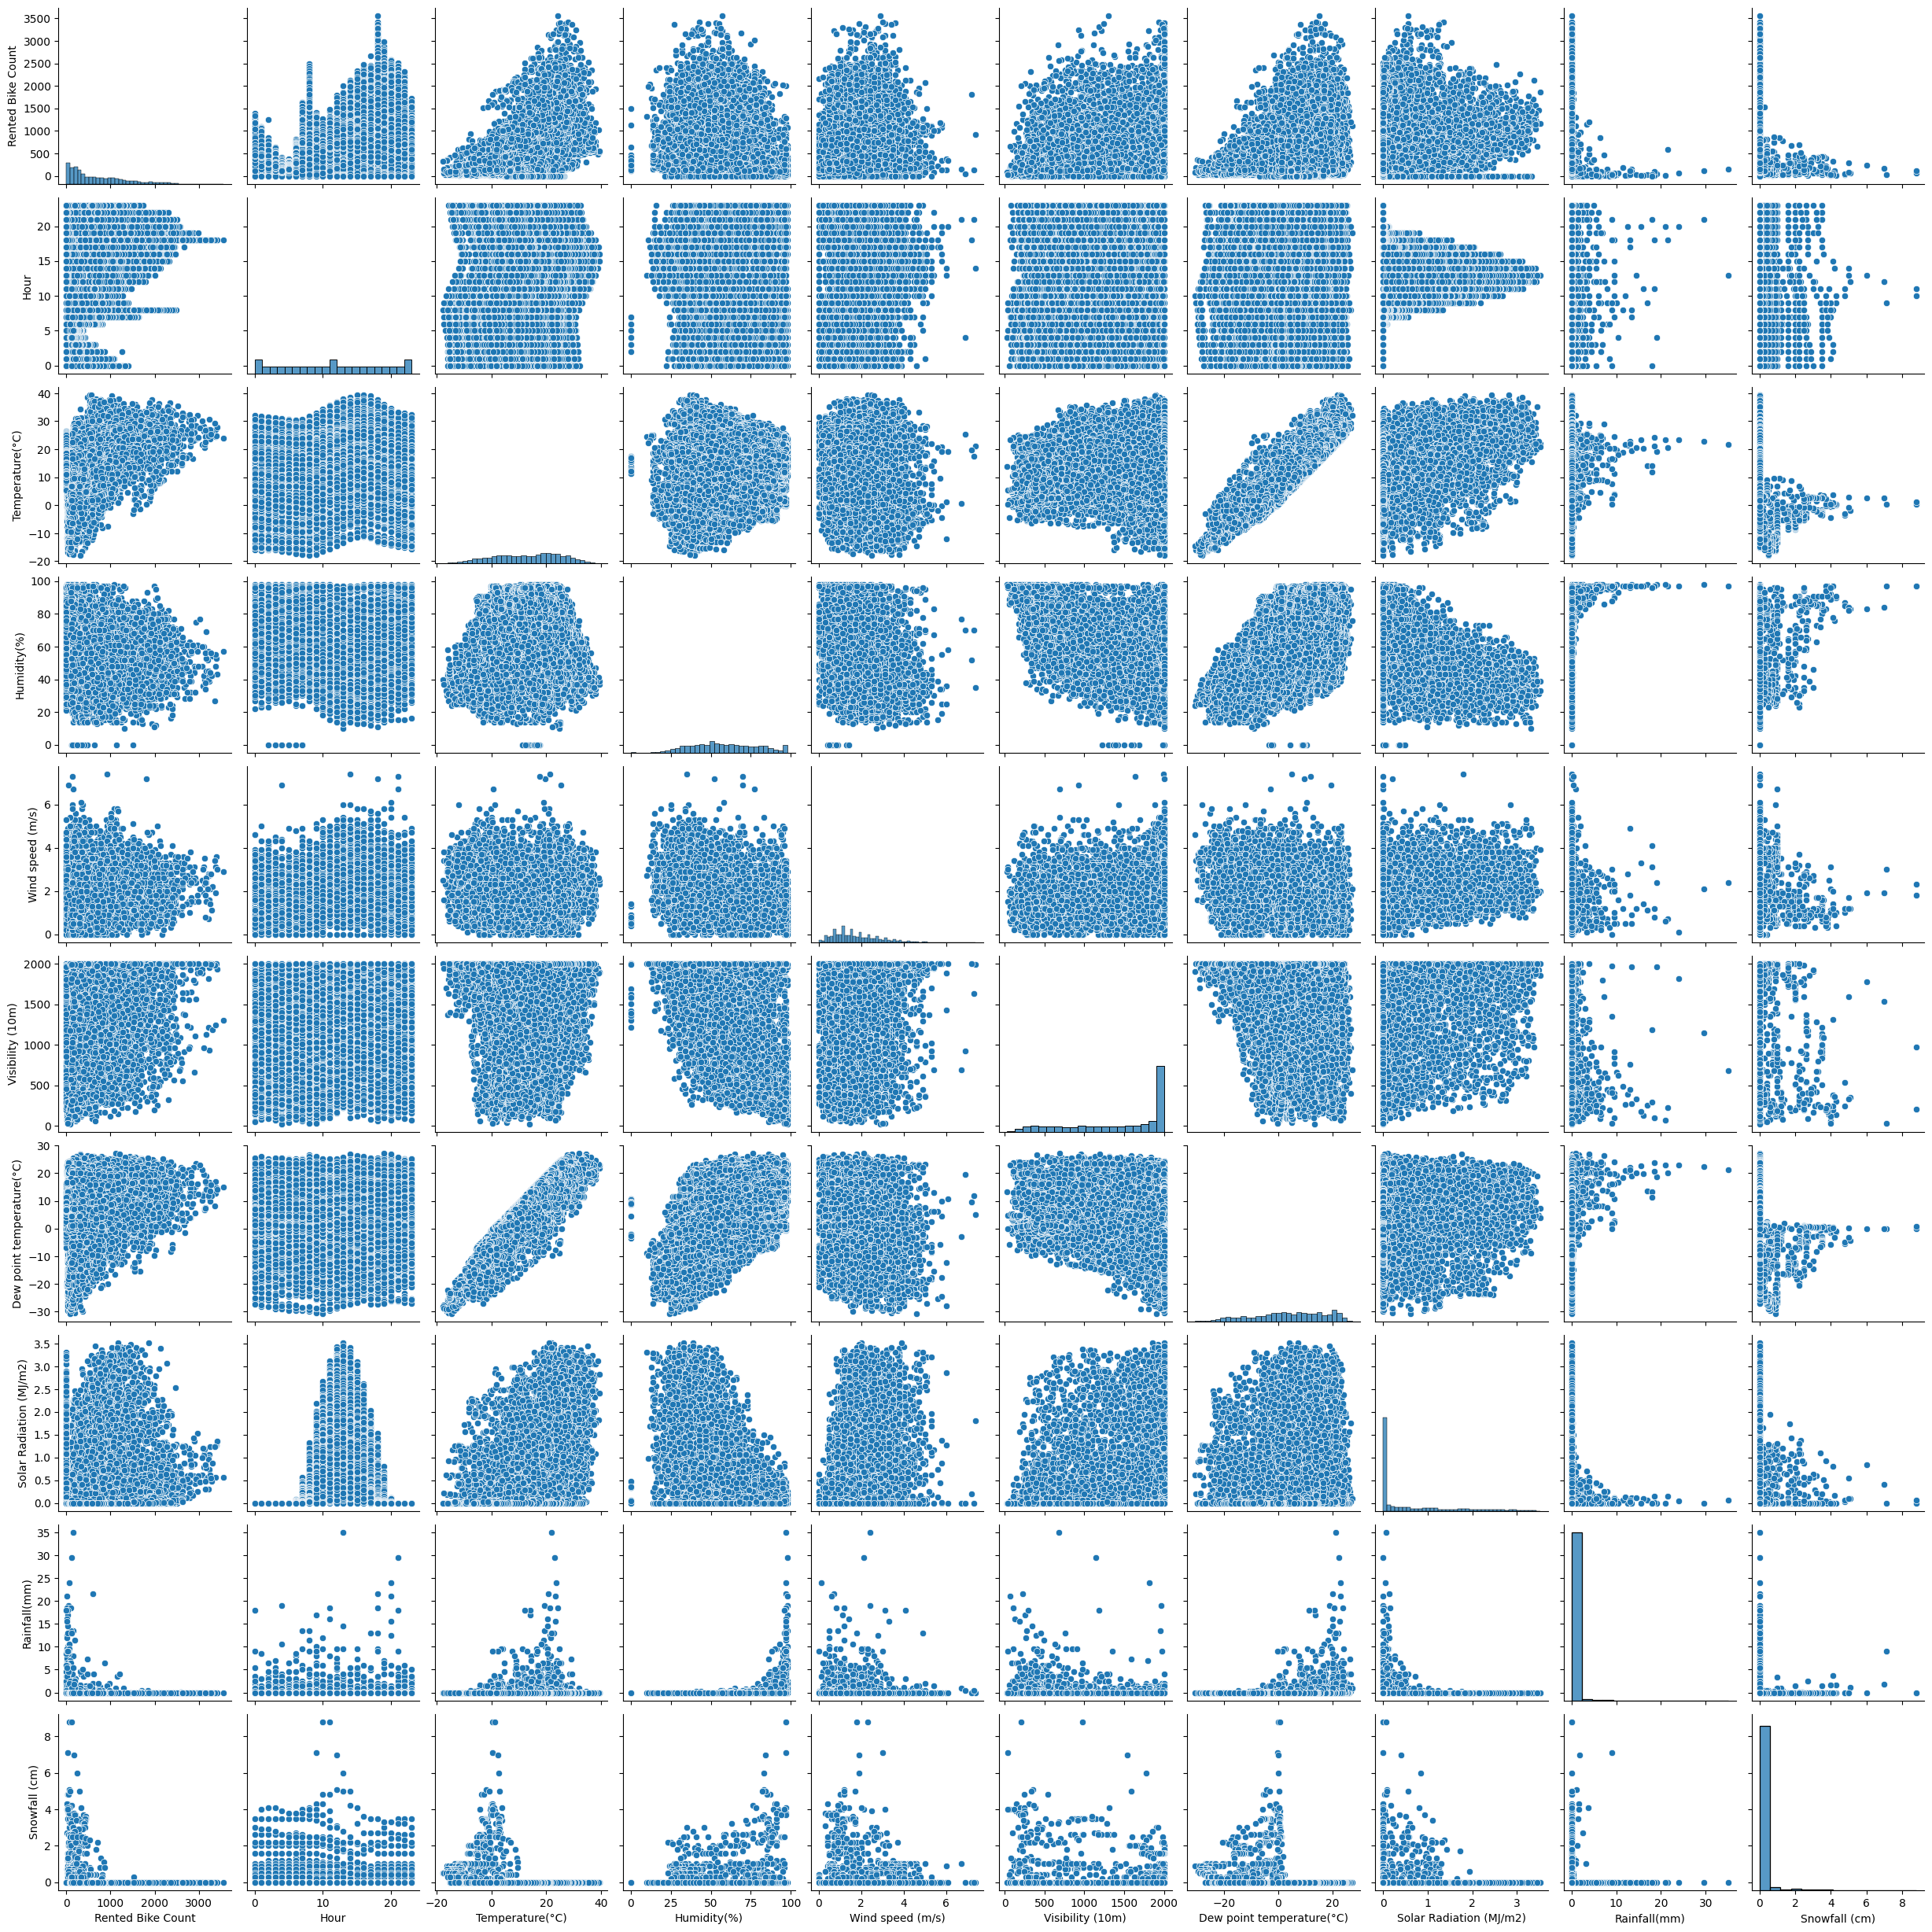

In [ ]:
sns.pairplot(df)
plt.show()

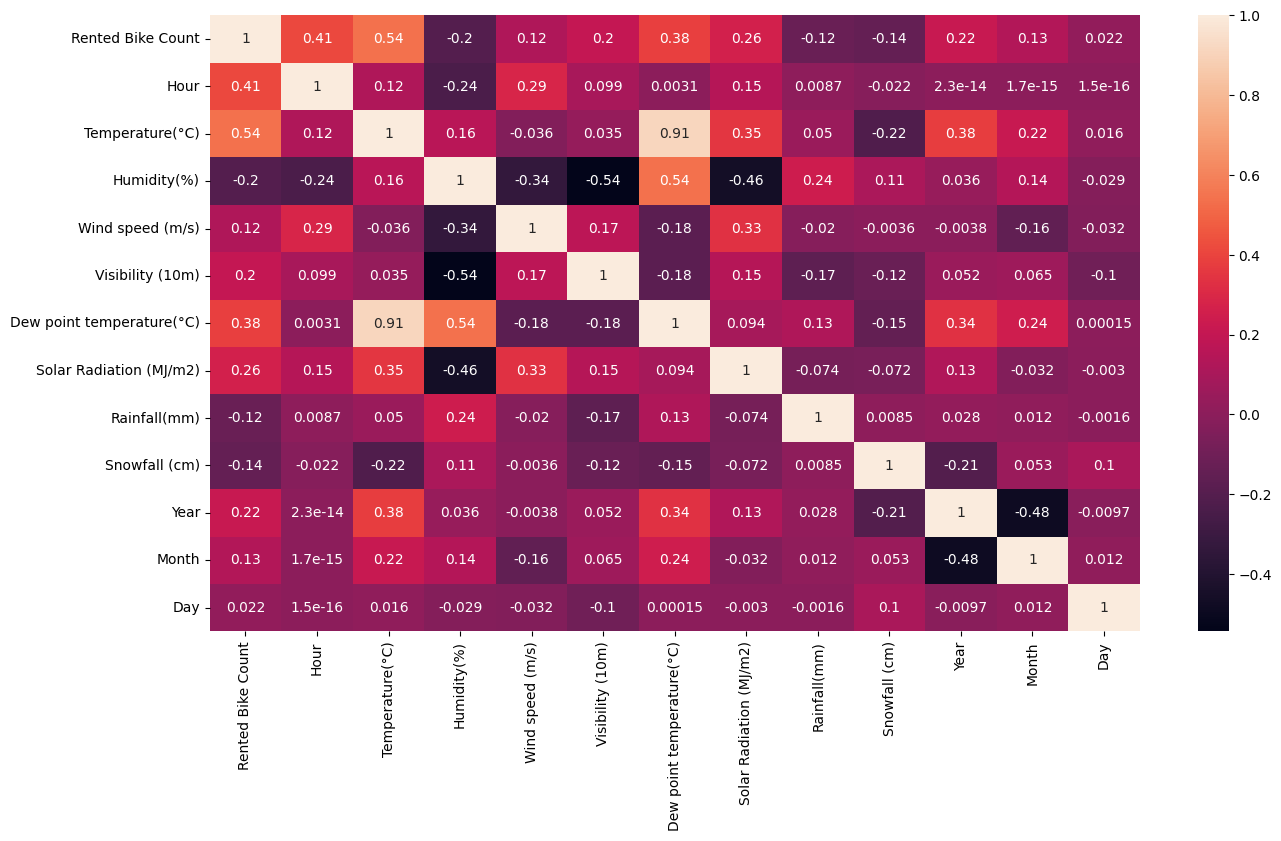

In [ ]:
numeric_df = df.drop(columns=['Date']).select_dtypes(include=np.number)
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

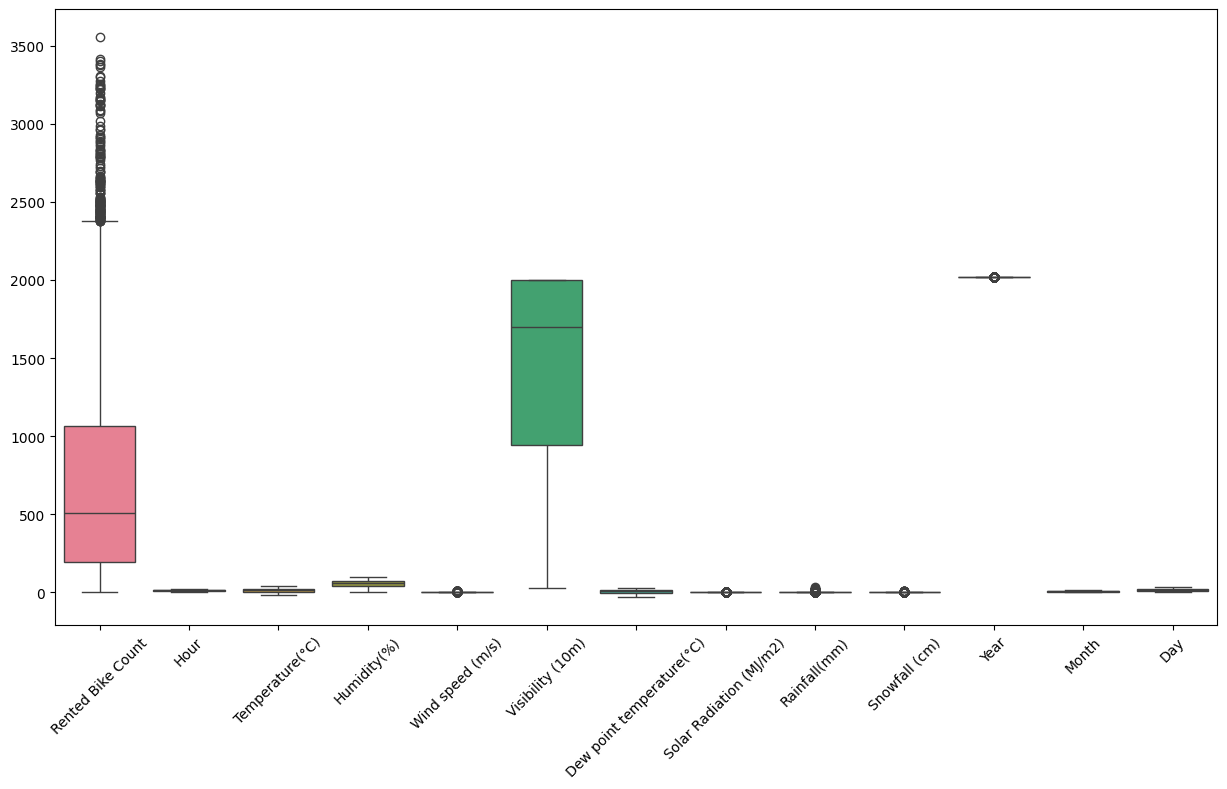

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.show()

In [ ]:
def outlier_removal(df):
    # Select only numerical columns for outlier removal
    numeric_df = df.select_dtypes(include=np.number)

    Q1 = numeric_df.quantile(0.25) # 1stQuartile
    Q3 = numeric_df.quantile(0.75) # 3rdQuartile
    IQR = Q3 - Q1 # InterquartileRange
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the original DataFrame based on outlier conditions in numerical columns
    clean_df = df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]
    return clean_df

In [ ]:
df1=outlier_removal(df)

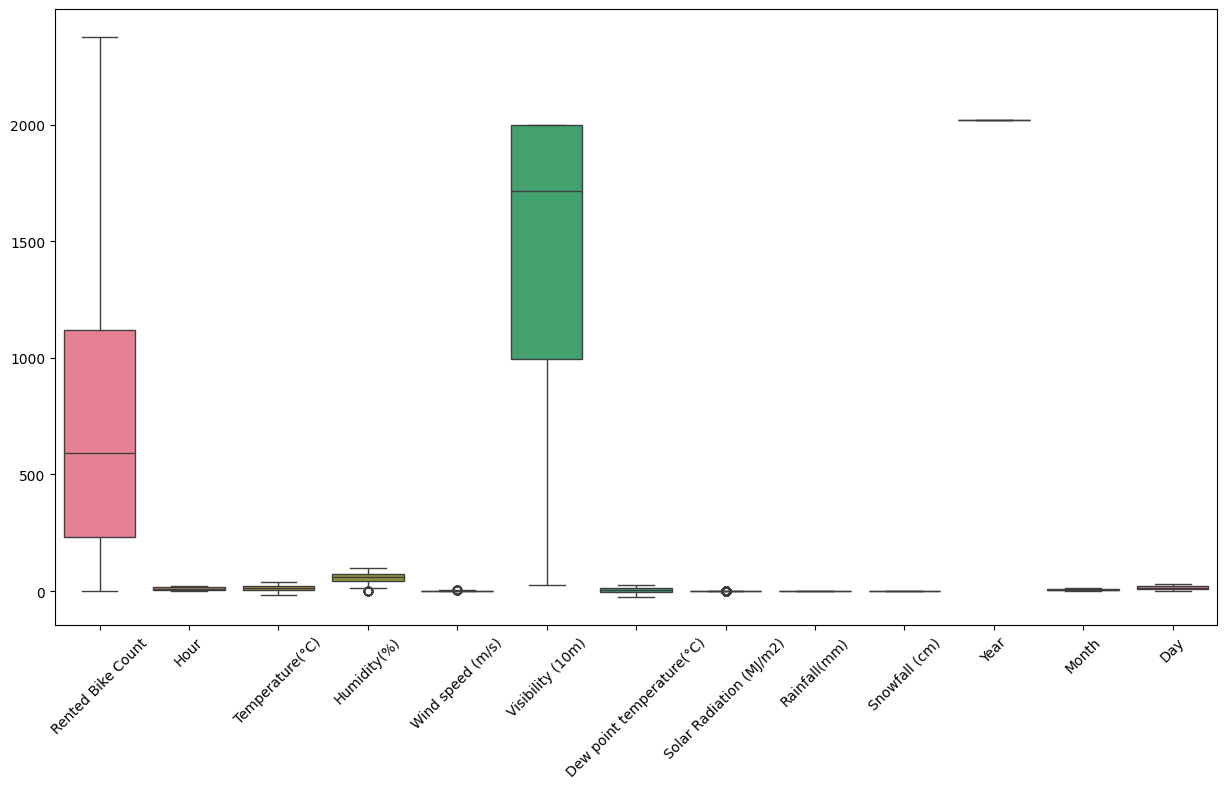

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.show()

In [ ]:
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day'],
      dtype='object')

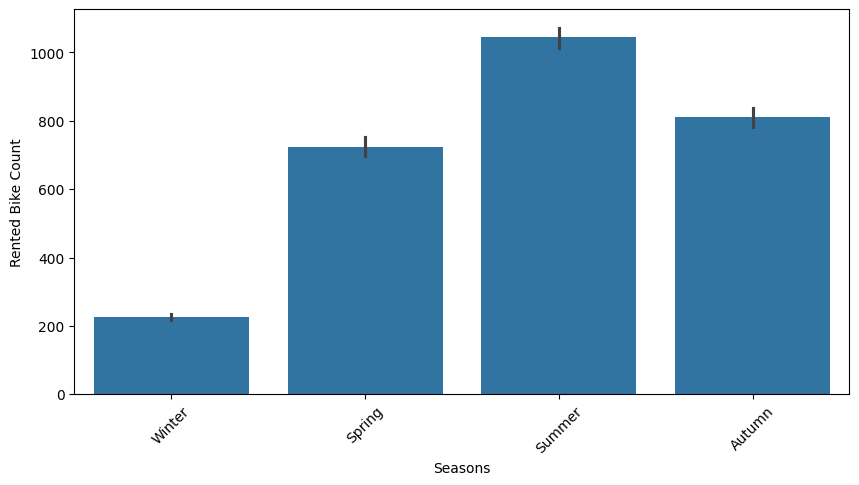

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df1['Seasons'],y=df1['Rented Bike Count'],data=df1)
plt.xticks(rotation=45)
plt.show()

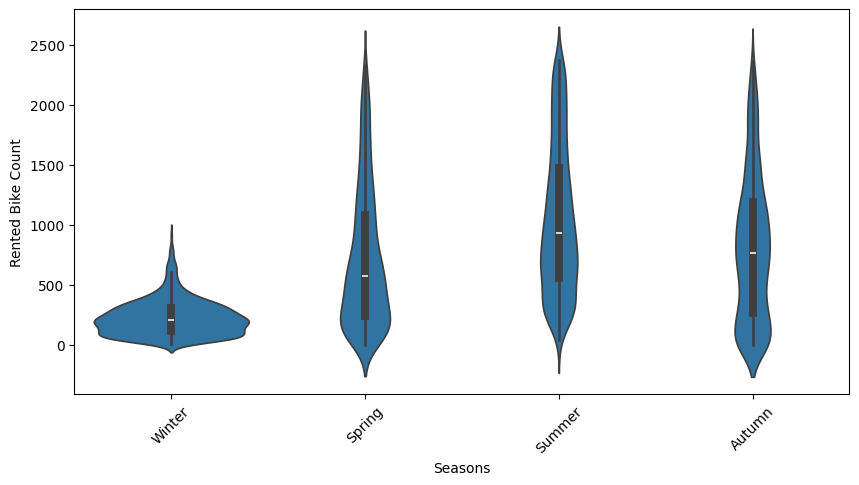

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df1['Seasons'],y=df1['Rented Bike Count'],data=df1)
plt.xticks(rotation=45)
plt.show()

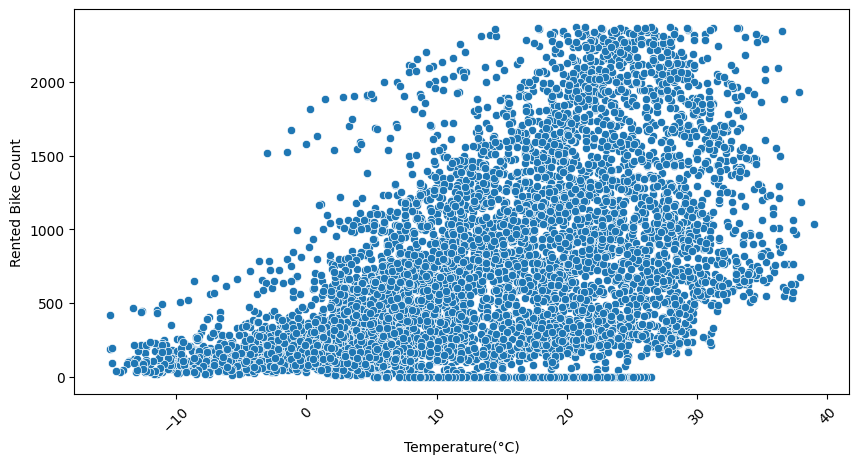

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df1['Temperature(°C)'],y=df1['Rented Bike Count'],data=df1)
plt.xticks(rotation=45)
plt.show()

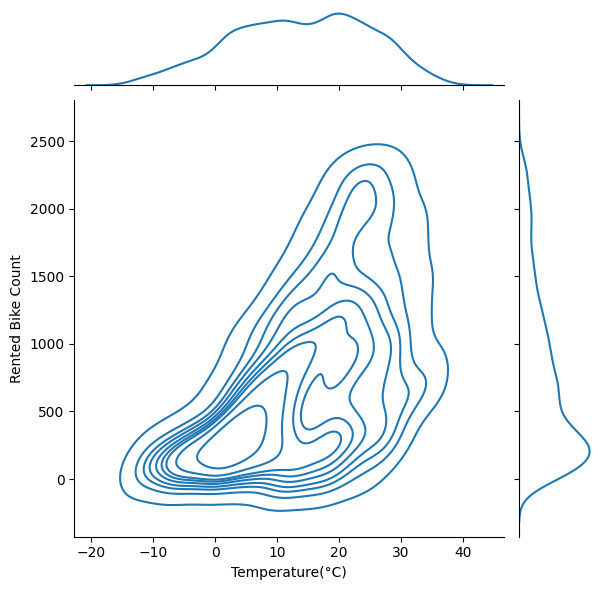

In [ ]:
sns.jointplot(x='Temperature(°C)', y='Rented Bike Count', data=df1, kind='kde')
plt.show()

In [ ]:
df1 = pd.get_dummies(df1, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=False)
# drop_first=False ensures all categories are represented
# Define features (X) and target variable (y)
X = df1[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
        'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
        'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
        'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
        'Functioning Day_No', 'Functioning Day_Yes']]  # Now these columns should exist
y = df1['Rented Bike Count']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df1[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes']]
y = df1['Rented Bike Count']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 204719.47543174252
R-squared: 0.4579347165315303


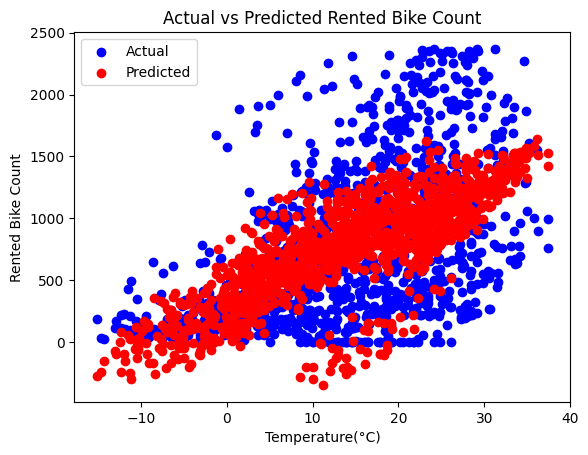

In [ ]:
plt.scatter(X_test['Temperature(°C)'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Temperature(°C)'], y_pred, color='red', label='Predicted')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Actual vs Predicted Rented Bike Count')
plt.legend()
plt.show()


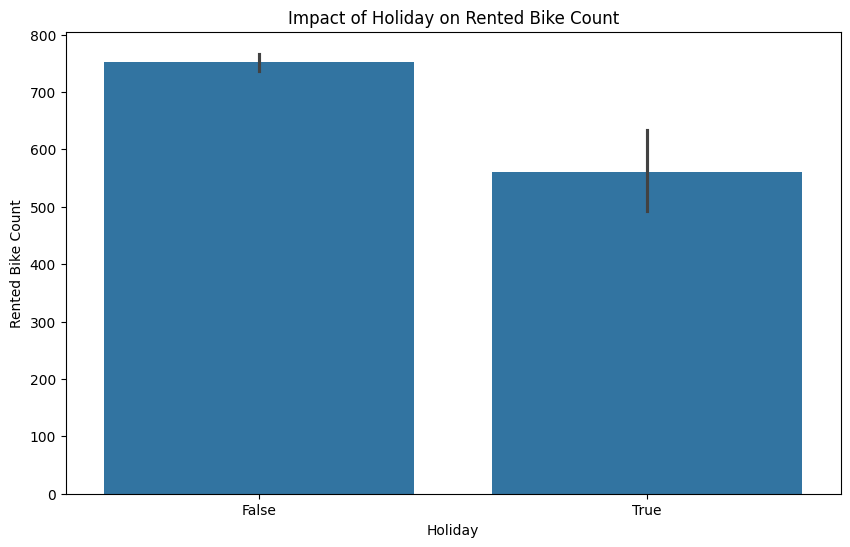

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday_Holiday', y='Rented Bike Count', data=df1)
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Impact of Holiday on Rented Bike Count')
plt.show()

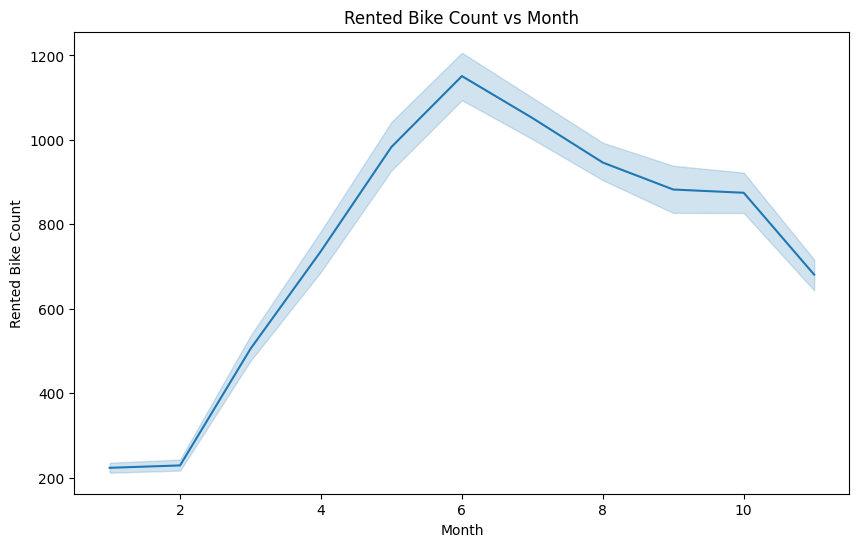

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Rented Bike Count', data=df1) # Pass x and y as keyword arguments with data
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count vs Month')
plt.show()



Based on the code and the visualizations, here are some insights:

1.  **Temperature is a significant factor:** The scatter plot and jointplot of 'Temperature(°C)' vs 'Rented Bike Count' show a clear positive correlation. As temperature increases, the number of rented bikes tends to increase. The linear regression model also uses temperature as a feature, suggesting its importance.

2.  **Seasonality matters:** The bar plot and violin plot of 'Seasons' vs 'Rented Bike Count' clearly demonstrate a seasonal pattern. Summer appears to have the highest rented bike count, followed by Autumn and Spring, with Winter having the lowest. This aligns with the temperature correlation. The use of one-hot encoding for 'Seasons' in the model allows it to capture these seasonal effects.

3.  **Outlier Handling was applied:** The code includes a function `outlier_removal` and applies it to create `df1`. The boxplots before and after outlier removal show that the distributions of numerical features are less spread out after removing outliers, which can improve model performance.

4.  **Holidays have an impact:** The bar plot of 'Holiday' vs 'Rented Bike Count' suggests that there is a difference in rented bike counts between 'Holiday' and 'No Holiday'. While the plot doesn't provide a definitive conclusion on whether holidays increase or decrease rentals without a clear scale, the model includes 'Holiday' as a feature, implying its relevance.

5.  **Functioning Day is crucial:** The one-hot encoding of 'Functioning Day' into 'Functioning Day_No' and 'Functioning Day_Yes' and its inclusion in the model indicate that whether the bike service is functioning is a key factor in determining the number of rented bikes. We would expect 'Functioning Day_No' to be associated with zero or very low rented bike counts.

6.  **Other factors included:** The linear regression model incorporates a variety of other meteorological factors like 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', and 'Snowfall (cm)'. The heatmap provides insights into the correlations between these numerical features and 'Rented Bike Count'. For example, 'Dew point temperature(°C)' and 'Solar Radiation (MJ/m2)' show positive correlations with 'Rented Bike Count', while 'Humidity(%)', 'Rainfall(mm)', and 'Snowfall (cm)' show negative correlations.

7.  **Model Performance:** The Mean Squared Error and R-squared values provide metrics for the linear regression model's performance. The R-squared value indicates the proportion of the variance in the rented bike count that is predictable from the features. A higher R-squared value is generally better. The MSE measures the average of the squares of the errors, providing a measure of the model's prediction accuracy.

8.  **Potential for Further Exploration:** The line plot for 'Rented Bike Count vs Month' suggests that analyzing monthly trends could provide additional insights beyond just seasonal effects. The model includes 'Seasons', which are broader than individual months, so looking at monthly patterns could reveal more granular variations.

In summary, the analysis highlights the strong influence of temperature and seasonality on bike rental demand. The model incorporates these and other relevant factors, and the visualizations support these relationships. The outlier removal step and the inclusion of various features are good practices for building a predictive model for this type of data.